# Building Character level Language Model

In [1]:
words = open('names.txt','r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
b = {}
for w in words:
    start_char = ['<S>'] + list(w)+ ['<E>']
    for ch1, ch2 in zip(start_char, start_char[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram,0) + 1

In [5]:
b.items()

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [6]:
sorted(b.items(),key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch

In [8]:
N = torch.zeros((27,27),dtype = torch.int32)

In [9]:
all_chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(all_chars)}
stoi['.'] = 0

In [10]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [11]:
b = {}
for w in words:
    start_char = ['.'] + list(w)+ ['.']
    for ch1, ch2 in zip(start_char, start_char[1:]):
        ix1= stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [12]:
itos = {i:s for s,i in stoi.items()}

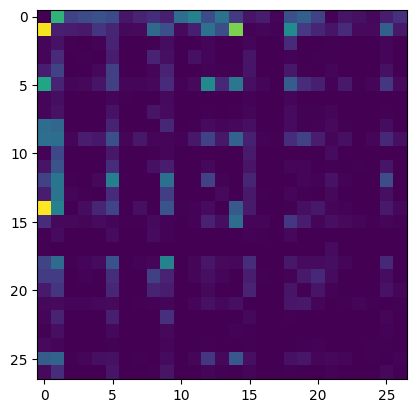

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [14]:
# Visualizing the bigram sequences from the dataset.
plt.figure(figsize = (16,16))
plt.imshow(N, cmap="Greens")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr, ha="center",va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center",va="top", color="gray")
plt.axis('off')

(-0.5, 26.5, 26.5, -0.5)

In [14]:
N[0]


tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [15]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [16]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1,replacement=True,generator=g).item()
itos[ix]

'c'

In [17]:
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.2895, 0.5552, 0.1552])

In [18]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 1])

In [19]:
# Calculating probabilities across each row
P = (N + 1).float()   # Adding 1 to smoothen the model and avoid infinite values for log likelihood (Model smoothing)
P /= P.sum(1,keepdim=True)

In [20]:
P[1].sum()

tensor(1.)

In [21]:
# Creating a model which creates names based on probabilities from P
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

deen.
pereltwnigua.
sadryrolyiniydavesole.
rish.
be.


In [22]:
log_likelihood = 0.0
n = 0
for w in words:
    start_char = ['.'] + list(w)+ ['.']
    for ch1, ch2 in zip(start_char, start_char[1:]):
        ix1= stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob: .4f} {logprob:.4f}')
        N[ix1, ix2] += 1

print(f'{log_likelihood}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

-559951.5625
nll=tensor(559951.5625)
2.4543561935424805


Product of these denote the quality of the model. So it must be high. Since product of probabilities is a very small number, we work with log of the probabilities instead -> LOG LIKELIHOOD.

GOAL: Maximize likelihood of the data wrt model parameters (statistical modeling)
- equivalent to minimizing the log likelihood (bcz log is monotonic)
- equivalent to minimizing the negative log likelihood
- equivalent to minimizing the average negative log likelihood

# Neural Network Approach

In [23]:
# Create a training set of bigrams (x, y)

xs, ys = [],[]

for w in words[:1]:
    start_char = ['.'] + list(w)+ ['.']
    for ch1, ch2 in zip(start_char, start_char[1:]):
        ix1= stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [24]:
xs

tensor([ 0,  5, 13, 13,  1])

In [25]:
ys

tensor([ 5, 13, 13,  1,  0])

In [61]:
# Initialize weights
W = torch.randn((27,27), generator=g,requires_grad=True)

In [63]:
# nlls = torch.zeros(5)
# for i in range(5):
#     x = xs[i].item()
#     y = ys[i].item()
#     print('------')
#     print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x} , {y}')
#     print('input to the neural net:', x)
#     print('output probabilites from the neural net:', probs[i])
#     print('label (actual next character):', y)
#     p = probs[i,y]
#     print('Probability assigned by the net to the correct character:', p.item())
#     logp =  torch.log(p)
#     print('log likelihood:', logp.item())
#     nll = -logp
#     print('negative log likelihood:', nll.item())
#     nlls[i] = nll
# print("-------------")
# print('average negative log likelihood, i.e. loss', nlls.mean().item())

# Optimization

In [91]:
# Create a training set of bigrams (x, y)

xs, ys = [],[]

for w in words[:1]:
    start_char = ['.'] + list(w)+ ['.']
    for ch1, ch2 in zip(start_char, start_char[1:]):
        ix1= stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ',num)

. e
e m
m m
m a
a .
number of examples:  5


In [92]:
# forward pass
import torch.nn.functional as F

# gradient descent
for k in range(100):
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W  #preict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(5),ys].log().mean()  + 0.01*(W**2).mean() # Second part of the equation: Regularization
    #line 4 and 5 is basically softmax
    print(loss.item())
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -0.1*W.grad


1.8014068603515625
1.788156270980835
1.7750047445297241
1.7619518041610718
1.7489988803863525
1.7361446619033813
1.7233902215957642
1.7107349634170532
1.6981796026229858
1.6857235431671143
1.6733671426773071
1.661110281944275
1.648952841758728
1.636894941329956
1.6249366998672485
1.6130775213241577
1.6013176441192627
1.589657187461853
1.5780956745147705
1.566632866859436
1.5552688837051392
1.5440032482147217
1.5328361988067627
1.5217671394348145
1.5107958316802979
1.4999221563339233
1.4891458749771118
1.4784666299819946
1.4678841829299927
1.4573981761932373
1.4470083713531494
1.4367141723632812
1.4265154600143433
1.4164118766784668
1.406402826309204
1.3964879512786865
1.386667013168335
1.3769395351409912
1.367305040359497
1.3577630519866943
1.3483129739761353
1.3389546871185303
1.3296873569488525
1.320510745048523
1.3114241361618042
1.3024272918701172
1.293519377708435
1.2847000360488892
1.2759685516357422
1.267324686050415
1.2587674856185913
1.2502965927124023
1.2419114112854004
1.233

In [93]:
print(loss.item())

0.9328187108039856


In [87]:
# Finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

In [95]:
for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

emha.
emxjmab.
xssqcupyryhuwqphwxa.
emfemzmzunikphrmc.
ujsemaarfqcsettaijpdctjpddfgsvtma.
